# Visuals for R-squared blog post

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import linear_model

In [159]:
xs = sorted([-2,-1,1,4], reverse=True)
ys = sorted([-3,-1,3,3], reverse=True)

In [160]:
reg = linear_model.LinearRegression()
reg.fit([[x] for x in xs], ys)
reg.coef_
reg.intercept_

0.0

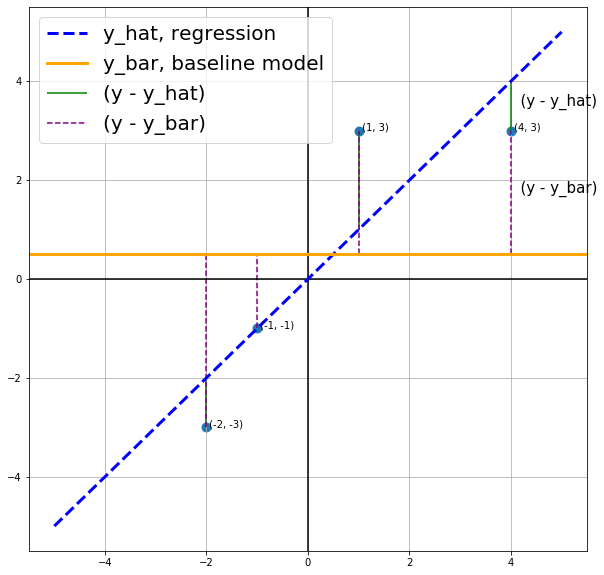

In [177]:
fig, ax = plt.subplots(figsize=(10,10))

# Plot X and Y axis lines
ax.axhline(0, color='black')
ax.axvline(0, color='black')

# # Annotations
for xy in zip(xs, ys):
    ax.annotate(f' {xy}', xy)   

# Plot points
ax.scatter(xs, ys, 80);

def regression(xs):
    if isinstance(xs, int):
        return int(reg.coef_*xs-reg.intercept_)
    else:
        ys = []
        for x in xs:
            ys.append(reg.coef_*x-reg.intercept_)
        return ys

# Plot regression, y_hat
x = np.linspace(-5,5,100)
ax.plot(x, regression(x), 'blue', lw=3, linestyle='dashed', label='y_hat, regression')

# # # Plot residuals to y_hat
for i, xy in enumerate(zip(xs, ys)):
    x = xy[0]
    y = xy[1]
    y_min, y_max = sorted([y, regression(x)])
    
    if i == 0:
        ax.vlines(x, ymin=y_min, ymax=y_max, color='green', label='(y - y_hat)')
        ax.annotate('  (y - y_hat)', xy=(x, np.mean([y_min, y_max])), size=15)
    else:
        ax.vlines(x, ymin=y_min, ymax=y_max, color='green')
    
        
# Plot y_bar
ax.axhline(np.mean(ys), lw=3, color='orange', label='y_bar, baseline model')


# # Plot residual to y_bar
for i, xy in enumerate(zip(xs, ys)):
    x = xy[0]
    y = xy[1]
    y_min, y_max = sorted([np.mean(ys), y])
    if i == 0:
        ax.vlines(x, ymin=y_min, ymax=y_max, color='purple', linestyles='dashed', label='(y - y_bar)')
        ax.annotate('  (y - y_bar)', xy=(x, np.mean([y_min, y_max])), size=15)
    else:
        ax.vlines(x, ymin=y_min, ymax=y_max, color='purple', linestyles='dashed')

# 
ax.legend(fontsize=20)
ax.grid()


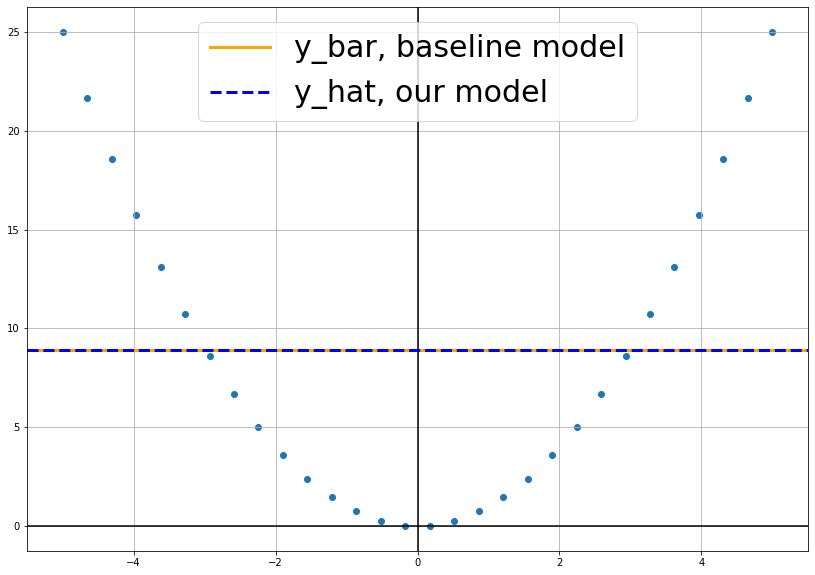

In [138]:
fig2, ax2 = plt.subplots(figsize=(14,10))

# Plot X and Y ax2is lines
ax2.axhline(0, color='black')
ax2.axvline(0, color='black')


# Plot parabola
x = np.linspace(-5,5,30)
y = x**2
ax2.scatter(x, y)

# plt.annotate('R-squared=0,')

# Plot y_bar
ax2.axhline(np.mean(y), lw=3, color='orange', label='y_bar, baseline model')

# Plot y_hat
ax2.axhline(np.mean(y), lw=3, color='blue', linestyle='dashed', label='y_hat, our model')

# Add gridlines
ax2.legend(fontsize=30)
ax2.grid();

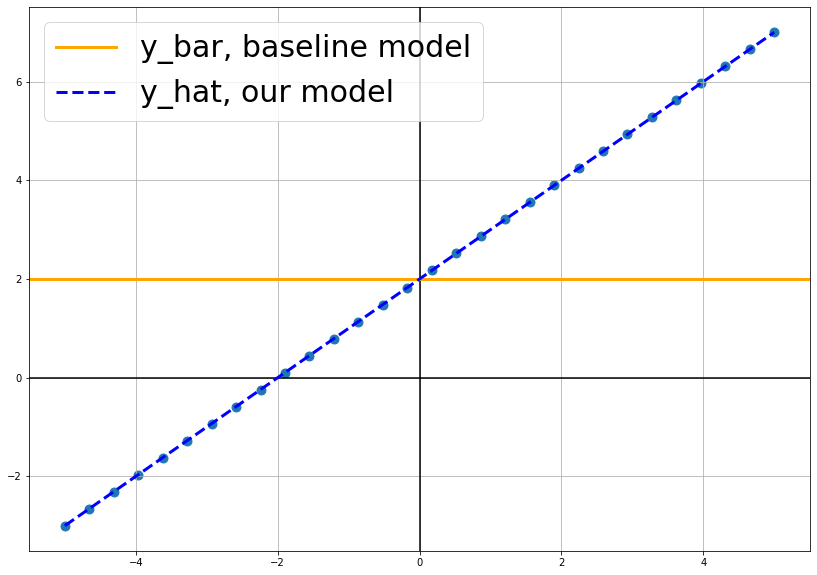

In [137]:
fig3, ax3 = plt.subplots(figsize=(14,10))

# Plot X and Y axis lines
ax3.axhline(0, color='black')
ax3.axvline(0, color='black')


# Plot parabola
x = np.linspace(-5,5,30)
y = x + 2
ax3.scatter(x, y, s=80)

# Plot y_bar
ax3.axhline(np.mean(y), lw=3, color='orange', label='y_bar, baseline model')

# Plot y_hat
ax3.plot(x, y, lw=3, color='blue', linestyle='dashed', label='y_hat, our model')

# Add gridlines
ax3.legend(fontsize=30)
ax3.grid();